In [1]:
import pandas as pd

In [2]:
df_cars_raw_data = pd.read_csv('../data/car.data', header=None, names=['buying', 'maint', 'doors', 'persons', 
                                                                       'lug_boot', 'safety', 'evaluation'])

### EDA

In [3]:
def get_df_info(df, include_unique_values=False):
    col_name_list = list(df.columns)
    col_type_list = [type(df[col][0]) for col in col_name_list]
    col_null_count_list = [df[col].isnull().sum() for col in col_name_list]
    col_unique_count_list = [df[col].nunique() for col in col_name_list]
    col_memory_usage_list = [df[col].memory_usage(deep=True) for col in col_name_list]
    df_total_memory_usage = sum(col_memory_usage_list) / 1048576
    if include_unique_values:
        col_unique_list = [df[col].unique() for col in col_name_list]
        df_info = pd.DataFrame({'column_name': col_name_list, 'type': col_type_list, 
                                'null_count': col_null_count_list, 'nunique': col_unique_count_list, 
                                'unique_values': col_unique_list})
    else:
        df_info = pd.DataFrame({'column_name': col_name_list, 'type': col_type_list, 
                                'null_count': col_null_count_list, 'nunique': col_unique_count_list})
    return df_info, df_total_memory_usage

In [4]:
df_cars_raw_data.head()

,buying,maint,doors,persons,lug_boot,safety,evaluation
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
df_cars_raw_data_info, df_cars_raw_data_mem_usage = get_df_info(df_cars_raw_data, True)
df_cars_raw_data_info

,column_name,type,null_count,nunique,unique_values
0,buying,<class 'str'>,0,4,"[vhigh, high, med, low]"
1,maint,<class 'str'>,0,4,"[vhigh, high, med, low]"
2,doors,<class 'str'>,0,4,"[2, 3, 4, 5more]"
3,persons,<class 'str'>,0,3,"[2, 4, more]"
4,lug_boot,<class 'str'>,0,3,"[small, med, big]"
5,safety,<class 'str'>,0,3,"[low, med, high]"
6,evaluation,<class 'str'>,0,4,"[unacc, acc, vgood, good]"


In [6]:
for col in df_cars_raw_data:
    print('\nCol {} value_counts: \n{}'.format(col, df_cars_raw_data[col].value_counts()))


Col buying value_counts: 
low      432
vhigh    432
high     432
med      432
Name: buying, dtype: int64

Col maint value_counts: 
low      432
vhigh    432
high     432
med      432
Name: maint, dtype: int64

Col doors value_counts: 
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64

Col persons value_counts: 
2       576
4       576
more    576
Name: persons, dtype: int64

Col lug_boot value_counts: 
small    576
big      576
med      576
Name: lug_boot, dtype: int64

Col safety value_counts: 
low     576
high    576
med     576
Name: safety, dtype: int64

Col evaluation value_counts: 
unacc    1210
acc       384
good       69
vgood      65
Name: evaluation, dtype: int64


### Preprocessing

In [7]:
def get_cat_codes(str_val, col_name):
    
    if str_val in ['low', '2', 'small', 'unacc']:
        return 0
    
    if str_val in ['med', '3', 'acc']:
        return 1
    
    if str_val in ['high', 'more', 'big', 'good']:
        return 2
    
    if str_val in ['vhigh', '5more', 'vgood']:
        return 3
    
    if str_val == '4' and col_name == 'persons':
        return 1
    else:
        return 2

In [8]:
df_cars = df_cars_raw_data.copy()
for c in df_cars.columns:
    df_cars['x_' + c] = df_cars[c].apply(lambda x: get_cat_codes(x, c))
df_cars = df_cars.iloc[:, 7:]
df_cars.columns = df_cars_raw_data.columns

### More EDA

In [9]:
df_cars.head()

,buying,maint,doors,persons,lug_boot,safety,evaluation
0,3,3,0,0,0,0,0
1,3,3,0,0,0,1,0
2,3,3,0,0,0,2,0
3,3,3,0,0,1,0,0
4,3,3,0,0,1,1,0


In [10]:
df_cars_info, df_cars_mem_usage = get_df_info(df_cars, True)
df_cars_info

,column_name,type,null_count,nunique,unique_values
0,buying,<class 'numpy.int64'>,0,4,"[3, 2, 1, 0]"
1,maint,<class 'numpy.int64'>,0,4,"[3, 2, 1, 0]"
2,doors,<class 'numpy.int64'>,0,4,"[0, 1, 2, 3]"
3,persons,<class 'numpy.int64'>,0,3,"[0, 1, 2]"
4,lug_boot,<class 'numpy.int64'>,0,3,"[0, 1, 2]"
5,safety,<class 'numpy.int64'>,0,3,"[0, 1, 2]"
6,evaluation,<class 'numpy.int64'>,0,4,"[0, 1, 3, 2]"


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7a569e9190>,
      dtype=object)

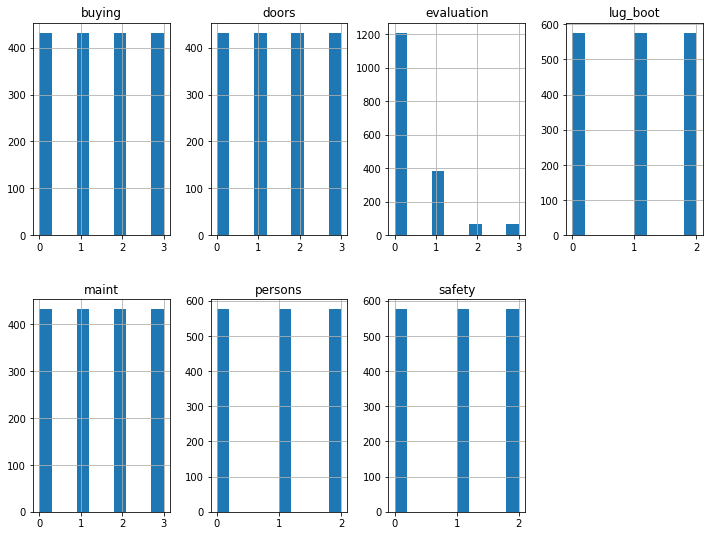

In [11]:
df_cars.hist(figsize=(12, 9), layout=(2, 4))

In [12]:
df_cars.describe()

,buying,maint,doors,persons,lug_boot,safety,evaluation
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,0.414931
std,1.118358,1.118358,1.118358,0.816733,0.816733,0.816733,0.740700
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.750000,0.750000,0.000000,0.000000,0.000000,0.000000
50%,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,0.000000
75%,2.250000,2.250000,2.250000,2.000000,2.000000,2.000000,1.000000
max,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000


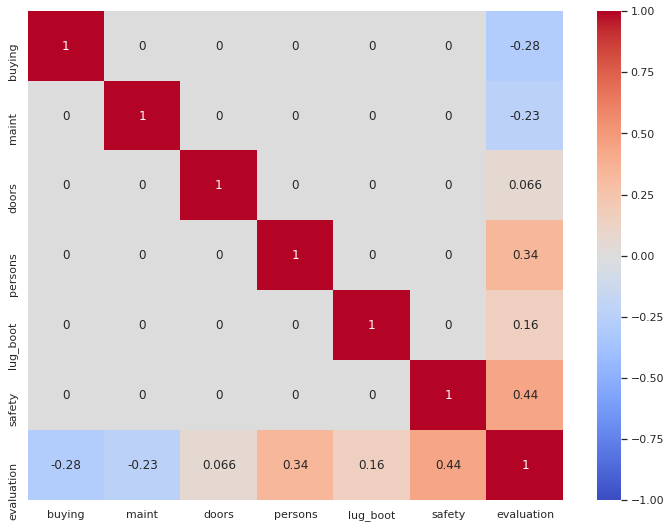

In [13]:
import seaborn as sb
sb.set(rc={'figure.figsize': (12, 9)})
sb.heatmap(df_cars.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

### Create and Evaluate Models

In [14]:
import sklearn
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.naive_bayes import GaussianNB as NBC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNC

from sklearn.model_selection import GridSearchCV, cross_validate

# for metrics, we shall use scorer strings in cross_validate

In [15]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [16]:
model_names = []
model_feature_counts = []
model_feature_names = []
model_acc_scores = []
model_bac_scores = []
model_prc_scores = []
model_rec_scores = []
model_auc_scores = []

In [17]:
X = df_cars.iloc[:, :-1]

In [18]:
rfc_model_1_cv = cross_validate(RFC(random_state=0), X, df_cars.evaluation, cv=5, n_jobs=5, verbose=10, scoring=['accuracy', 'balanced_accuracy', 'precision_weighted', 'recall_weighted', 'roc_auc_ovr_weighted'])
model_names.append('rfc_model_1_cv')
model_feature_counts.append(X.shape[1])
model_feature_names.append(list(X.columns))
model_acc_scores.append(rfc_model_1_cv['test_accuracy'].mean())
model_bac_scores.append(rfc_model_1_cv['test_balanced_accuracy'].mean())
model_prc_scores.append(rfc_model_1_cv['test_precision_weighted'].mean())
model_rec_scores.append(rfc_model_1_cv['test_recall_weighted'].mean())
model_auc_scores.append(rfc_model_1_cv['test_roc_auc_ovr_weighted'].mean())

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.6s remaining:    0.9s
[Parallel(n_jobs=5)]: Done   3 out of   5 | elapsed:    0.6s remaining:    0.4s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.6s finished


In [19]:
df_model_eval = pd.DataFrame({'model': model_names, 'feature_count': model_feature_counts, 'feature_names': model_feature_names, 
                              'acc': model_acc_scores, 'bac': model_bac_scores, 'prc': model_prc_scores, 'rec': model_rec_scores, 'auc': model_auc_scores})
df_model_eval.round(2)

,model,feature_count,feature_names,acc,bac,prc,rec,auc
0,rfc_model_1_cv,6,"[buying, maint, doors, persons, lug_boot, safety]",0.82,0.67,0.83,0.82,0.95
